# Chem 30324, Spring 2018, Homework 2
## Due: February 1, 2018

## Problem 1. Gases on a table top

In class we derived the properties of a 3-dimensional gas from the Boltzmann distribution and three postulates, and you studied a 1-dimensional gas in Homework 1. Suppose you were interested instead in a 2-dimensional gas, for example gas molecules able to freely skate around on a surface but that couldn’t escape the surface.

### 1. Derive the Maxwell-Boltzman speed distribution for a 2-dimensional gas.

Each dimention is independent, so we can get the 2-D distribution from 1-D distribution: P(v)dv = (m/(2*$\pi$*k*T))*exp(-m(vx^2+vy^2)/(2*K*T))dvxdvy . We need to convert the coordinates from Cartesian coordinates to polar coordinates. To do that, we need to integrate over the angular dimension.

P(v) = $\int_0^{2\pi} (m/(2*\pi*kT))exp(-mv^2/(2KT))v d\theta$ = 2*$\pi$*v*(m/(2*$\pi$*k*T))*exp(-mv^2/(2*K*T)) = (mv/(kT))*exp(-mv^2)/(2*K*T))

### 2. Plot this 2-dimensional speed distribution for O2 molecules at 200, 400 and 600 K.

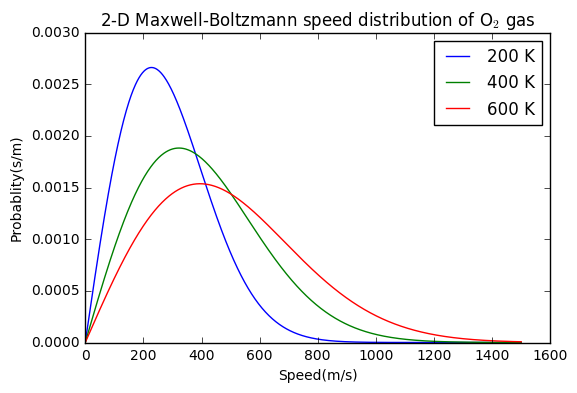

In [14]:
import numpy as np
import matplotlib.pyplot as plt

m = 32*1.6605e-27 # kg
k = 1.38e-23 # j/K

def Probablity(v,T):
      return v*m/(T*k)*np.exp(-m*v*v/(2*k*T))

plt.figure()
v=np.linspace(0,1500,1000)
for T in [200,400,600]: # k
    Prol = Probablity(v,T)
    plt.plot(v,Prol,label='{} K'.format(T))


legend=plt.legend()
plt.xlabel('Speed(m/s)')
plt.ylabel('Probablity(s/m)')
plt.title('2-D Maxwell-Boltzmann speed distribution of O$_2$ gas')

plt.show()

### 3. Calculate the mean (expected value) of the speed of a 2-dimensional gas of molecules. How does your answer compare to a 3-dimensional gas?

In [5]:
from sympy import * # import sympy for symbolic mathematics
v = symbols('v')
T,k,m= symbols('T,k,m',positive=True)
a=integrate(v**2*m/(T*k)*exp(-m*v*v/(2*k*T)),(v,0,oo))
pprint(a) # <v>

√2⋅√π⋅√T⋅√k
───────────
    2⋅√m   


Comparing to the mean speed of a 3-dimensional gas, which is (8kT/$\pi$m)^(1/2), they are all dependent on square root of T/m.

### 4. Calculate the mean kinetic energy of a 2-dimensional gas. How does your answer compare to a one and 3-dimensional gas?

In [6]:
b=integrate(1/2*m*v**3*m/(T*k)*exp(-m*v*v/(2*k*T)),(v,0,oo))
pprint(b) # <1/2*m*v**2>

1.0⋅T⋅k


The mean kinetic energy of a 1-dimensional gas is 0.5kT, the mean kinetic energy of a 3-dimensional gas is 1.5kT. The different components of velocity are independent of each other. The mean kinetic energy of each degree of freedom is 0.5kT.

## Problem 2. (Kinetics and Transport)

In junior Chemical Engineering laboratory, you will study the diffusion and solubility of CO$_2$ in an organic solvent using a diffusion cell like the one sketched here. <img src="imgs/HW2_P2.png">Let’s suppose that the gas space at the top of the diffusion cell is approximately 2 cm high and 4 cm in diameter. Further suppose that the gas in the head of the cell is pure CO$_2$ at 298 K and 1 bar pressure. Note that CO$_2$ has a collision diameter d of 0.40 nm.

### 5. What does gas kinetic theory predict for the gas self-diffusion constant D11 of CO2 gas in the cell, in cm^2/s?

In [16]:
import numpy as np
m = 44*1.6605e-27 # kg/amu
k = 1.38e-23 # j/K
T = 298 # k 
d = 0.4e-9 # m
p = 1e5 # Pa

v = (8*k*T/(np.pi*m))**0.5 # mean speed (m/s)
A = np.pi*d**2 # collision cross section (m^2)
l = k*T/p*(1/(2**0.5*A)) # mean free path (m)
D1 = 1/3*l*v*10000 # self-diffusion constant (cm^2/s)
print ('The gas self-diffusion constant of CO2 is {:.5E} cm^2/s.'.format(D1))

The gas self-diffusion constant of CO2 is 7.30064E-02 cm^2/s.


### 6. Use the Stokes-Einstein relationship to estimate the diffusion constant of CO2 in the Stoddard solvent.  How does this compare with the diffusion constant in the gas phase? Why?

In [17]:
r = 0.2e-9 # m
viscosity = 1e-3 # kg/(m*s) # viscosity can be in the range from 0.74 to 1.65 mPa*s
D2 = k*T/(4*np.pi*viscosity*r)*10000 # slip boundary (cm^2/s)
print ('The diffusion constant of CO2 in the Stoddard solvent is {:.5E} cm^2/s.'.format(D2))

The diffusion constant of CO2 in the Stoddard solvent is 1.63627E-05 cm^2/s.


In [ ]:
# Diffusion constant in liquid is lower than in gas due higher viscosity, more drag which leads
# to reduced mobility in liquid phase in presence of slip boundaries

### 7. We found in class that the probability for a molecule to diffuse a distance $x$ in time $t$ is Gaussian with mean 0 and standard deviation $\sigma = \sqrt{2D_{11}t}$. About how long will it take for 1/3 of the molecules starting at the center of the gas space to diffuse all the way to the surface of the liquid, i.e., > 1 cm?

In [23]:
from scipy.stats import norm

#norm.ppf is percent point function. 
#we can use it to find a point y in the standard normal distribution, 
#to make the probablity from -infinite to y is equal to 2/3. 

y = norm.ppf(2/3) 

#p(y) is the standard normal distribution, our p(x) is not. The relationship is
#x = (2Dt)^(1/2)*y = sigma*y, we want x to be 1 cm, we got y from norm.ppf.
#Now, we can solve sigma and t.

sigma = 1/y # sigma (cm) = 1 (cm)/y (no unit)
t = sigma**2/(2*D1) # seconds
print ('It will take {0:.3f} s for 1/3 of the molecules to diffuse to the surface.'.format(t))

#We can also integrate the distribution function from 1 cm to infinite, and make the integral equal to 1/3,
#and solve the equation to get t.


It will take 36.915 s for 1/3 of the molecules to diffuse to the surface.


### 8. How many collisions on average does one of these diffusing CO2 molecule make with other gas molecules on the way from the middle of the vapor space to the surface of the solvent?

In [24]:
num = v/l*t # num = z*t = mean speed / mean free path * time
print ('The number of collisions of one molecule is {:.5E}.'.format(num))

The number of collisions of one molecule is 2.41582E+11.


### 9. How far in total distance does this typical CO2 molecule travel in the time it takes to reach the solvent surface from the middle of the cell?

In [25]:
d_total = v*t # m
"We can also use d_total = num*l"
print ('The total distance is {:.5E} m.'.format(d_total))

The total distance is 1.39758E+04 m.


### 10. How many CO2 molecules impinge on the surface of the Stoddard solvent in one second?

In [26]:
Jw = 1/4*p/(k*T)*v # number of collisions /(area*time) 
area = 0.02**2*np.pi # m^2
time = 1 # second
num_2 = Jw*area*time
print ('{:.5E} molecules impinge on the surface in one second.'.format(num_2))

2.89219E+24 molecules impinge on the surface in one second.


### 11. Using your estimate of the diffusion constant in the solvent, how long does it take the same fraction CO2  molecules to diffuse a similar distance in 1-dimension in the liquid phase?

In [27]:
"""
same method as No.7
"""
t_2 = sigma**2/(2*D2)
print ('It will take {0:.3f} s for 1/3 of the molecules in the liquid to diffuse to the surface.'.format(t_2))

It will take 164706.113 s for 1/3 of the molecules in the liquid to diffuse to the surface.


### 12. Is it safe to assume that any CO2 that travels from the surface into the bulk of the solvent is rapidly replaced from the gas phase?

Yes, comparing the results of No.5 and No.6, or comparing the results of No.7 and No.11, we can find CO2 molecules travel much faster in gas phase than in the solvent. So any CO2 that travels from the surface into the bulk solvent will be rapidly replaced from the gas phase.

### 13. Suppose the volume of the gas-handling manifold is 100 cm^3 and is pressurized with CO2 in the morning to 1.1 atm.  What will the pressure in the manifold be four hours later, when lab starts, if the manifold has a pinhole of 1 μm^2?

In [28]:
V = 100/(100**3) # m^3
P0 = 1.1*101325 # Pa
Area = 1*(1e-6)**2 # m^2
Time = 4*3600 # seconds
tau = V/Area*(2*np.pi*m/(k*T))**0.5
Pressure = P0*np.exp(-Time/tau) # Pa
print('The pressure will be {0:.8} Pa ({1:.8} atm).'.format(Pressure, Pressure/101325))


The pressure will be 109948.71 Pa (1.0851094 atm).
